In [1]:
%run ../../../../../../../../recidiviz-research/utils/research_utils.py

In [2]:
adjust_plot_scale(0.4)

**DATA DESCRIPTION** from the DOC

Incarcerated individuals within DOC custody as of December, 31 2020.
Persistent Offenders are identified with a second or third strike
Aggravated Murder  is identified by RCW
Hard Time for Armed Crime was an RCW change that added additional time for crimes committed with a firearm.
Enhancements included to show those offenses that involved the use of a firearm.

Data Pulled from:
https://docs.google.com/spreadsheets/d/1s4IkJdSlT-bnvkSMjlRKrzcMmUXAxBey/edit?usp=sharing&ouid=117588189792004847836&rtpof=true&sd=true

In [3]:
wa_df = pd.read_csv(
    "WA_incarceration_population_12_30_2021.csv",
    parse_dates=["DATE_OF_BIRTH", "DATE_OF_OFFENSE", "DATE_OF_SENTENCE"],
)
print(len(wa_df))
print(wa_df["DOCNUM"].nunique())
wa_df.head()

46297
14723


,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT
0,28255,1937-11-24,WHITE,N,MALE,1960-07-15,1960-10-26,9.95.120,PAROLE VIOLATION,MISDEMEANOR - MISCELLANEOUS,27393.75,27393.0,NaN,PIERCE,N,N,NaN
1,28255,1937-11-24,WHITE,N,MALE,1987-06-06,1987-09-18,9A.40.02A,KIDNAPPING 1,KIDNAP 1,27393.75,27393.0,NaN,PIERCE,N,N,NaN
2,28255,1937-11-24,WHITE,N,MALE,1987-06-06,1987-09-18,9A.44.040,RAPE 1,RAPE 1,27393.75,27393.0,NaN,PIERCE,N,N,NaN
3,29644,1945-09-24,BLACK,N,MALE,1965-04-12,1965-10-29,9.48.030,MURDER 1,MURDER 1,30247.19,NaN,LIFE,KING,N,N,NaN
4,29644,1945-09-24,BLACK,N,MALE,1965-04-12,1965-10-29,9.48.030,MURDER 1,MURDER 1,30247.19,NaN,LIFE,KING,N,N,NaN


In [4]:
inspect_df(wa_df)

Types:
DOCNUM                           int64
DATE_OF_BIRTH           datetime64[ns]
RACE                            object
HISPANIC                        object
GENDER                          object
DATE_OF_OFFENSE         datetime64[ns]
DATE_OF_SENTENCE        datetime64[ns]
RCW_SHRT_NM                     object
RCW_TLE_NM                      object
OFFENSE                         object
TOTAL_SENTENCE                 float64
CONFINEMENT_LENGTH             float64
CONFINEMENT_TYPE                object
COUNTY_OF_CONVICTION            object
SECOND_STRIKE                   object
THIRD_STRIKE                    object
ENHANCEMENT                     object
dtype: object

Null values:
DOCNUM                      0
DATE_OF_BIRTH               0
RACE                        0
HISPANIC                    0
GENDER                      0
DATE_OF_OFFENSE            89
DATE_OF_SENTENCE          261
RCW_SHRT_NM                89
RCW_TLE_NM                 89
OFFENSE                    89
TO

,DOCNUM,TOTAL_SENTENCE,CONFINEMENT_LENGTH
count,46297.000000,46297.000000,37376.000000
mean,552906.673089,5860.513556,5231.681400
std,235173.446488,8737.473657,7276.612669
min,28255.000000,0.000000,0.000000
25%,366799.000000,1626.730000,1542.000000
50%,413271.000000,3101.820000,2737.000000
75%,807278.000000,7298.400000,6446.000000
max,999211.000000,156439.730000,123156.000000



Head:


,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT
0,28255,1937-11-24,WHITE,N,MALE,1960-07-15,1960-10-26,9.95.120,PAROLE VIOLATION,MISDEMEANOR - MISCELLANEOUS,27393.75,27393.0,NaN,PIERCE,N,N,NaN
1,28255,1937-11-24,WHITE,N,MALE,1987-06-06,1987-09-18,9A.40.02A,KIDNAPPING 1,KIDNAP 1,27393.75,27393.0,NaN,PIERCE,N,N,NaN
2,28255,1937-11-24,WHITE,N,MALE,1987-06-06,1987-09-18,9A.44.040,RAPE 1,RAPE 1,27393.75,27393.0,NaN,PIERCE,N,N,NaN
3,29644,1945-09-24,BLACK,N,MALE,1965-04-12,1965-10-29,9.48.030,MURDER 1,MURDER 1,30247.19,NaN,LIFE,KING,N,N,NaN
4,29644,1945-09-24,BLACK,N,MALE,1965-04-12,1965-10-29,9.48.030,MURDER 1,MURDER 1,30247.19,NaN,LIFE,KING,N,N,NaN


In [53]:
def race_or_ethnicity(row):
    if row["HISPANIC"] != "Y":
        return row["RACE"]
    elif row["RACE"] in ("BLACK", "NORTH AMERICAN INDIAN"):
        return row["RACE"]
    else:
        return "HISPANIC"


wa_df["race_or_ethnicity"] = wa_df.apply(race_or_ethnicity, axis=1)
wa_df["race_or_ethnicity"].value_counts(dropna=False)

WHITE                     27417
BLACK                      8042
HISPANIC                   5696
NORTH AMERICAN INDIAN      2566
ASIAN/PACIFIC ISLANDER     2113
UNKNOWN                     244
OTHER                       176
ESKIMO                       23
ALEUT                        20
Name: race_or_ethnicity, dtype: int64

In [7]:
# There's 1 record per person/offense, but all rows have the same total sentence value
# So assume that `TOTAL_SENTENCE` was applied for the latest offense
print(sum(wa_df[["DOCNUM", "TOTAL_SENTENCE"]].duplicated()))
print(sum(wa_df[["DOCNUM", "TOTAL_SENTENCE", "CONFINEMENT_TYPE"]].duplicated()))
sum(wa_df[["DOCNUM"]].duplicated())

31574
31574


31574

In [8]:
# Remove
sex_offenses = [
    "OTHER VIOLATION CHILD SEX",
    "NON-VIOLENT CHILD SEX",
    "RAPE OF CHILD 1",
    "P.N. SEX",
    "RAPE OF CHILD 2",
    "RAPE 1",
    "RAPE 2",
    "OTHER SEX CRIMES",
    "INDECENT LIBERTIES",
    "RAPE, OTHER",
]
sex_offense_stentences = wa_df[wa_df["OFFENSE"].isin(sex_offenses)]
sex_offense_stentences["RCW_SHRT_NM"].value_counts(dropna=False)

9A.44.083              1689
9A.44.073              1533
9A.44.076               824
9A.44.086               624
9A.44.040               525
9A.44.079               430
9.68A.070(1)            346
9A.44.132(1)(B)         196
9A.44.050(1)(A)         191
9.68A.090(2)            190
9A.44.089               172
9A.64.020(1)            171
9.68A.040               170
9A.44.050               131
9.68A.070               110
9.68A.070(2)            108
9A.44.100(1)(A)         101
9A.44.060                91
9A.44.050(1)(B)          71
9A.44.100(1)(B)          69
9.68A.050(1)             60
9A.44.115                59
9.68A.100                45
9.68A.101                42
9.68A.040(1)(A)          38
9A.44.132(1)(A)(II)      36
9A.44.132(1)(A)          34
9A.64.020(2)             33
9A.44.100                31
9.68A.050(2)             28
9A.88.070                28
9.68A.090                28
9A.44.070                26
9.68A.040(1)(B)          26
9A.44.10B                23
9A.88.080(1)(B)     

In [9]:
sex_offense_stentences["DOCNUM"].nunique()

3485

In [10]:
ineligible_people = sex_offense_stentences[
    sex_offense_stentences["DATE_OF_SENTENCE"] >= datetime.datetime(2001, 1, 1)
]["DOCNUM"].unique()
len(ineligible_people)

3254

In [11]:
wa_df[
    ~wa_df["OFFENSE"].isin(sex_offenses) & (wa_df["RCW_SHRT_NM"].str.contains("9.79"))
]["RCW_SHRT_NM"].value_counts(dropna=False).head(100)

9.79.050    1
Name: RCW_SHRT_NM, dtype: int64

In [12]:
wa_df[wa_df["DOCNUM"] == 256312]

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY
406,256312,1960-11-29,WHITE,N,MALE,2017-05-01,2018-03-27,9A.44.132(1),FAILURE TO REGISTER AS A FELONY SEX OFFENDER,OTHER FELONY,2554.44,2554.0,NaN,KITSAP,N,N,NaN,WHITE
407,256312,1960-11-29,WHITE,N,MALE,2017-07-05,2018-03-27,9A.52.025,RESIDENTIAL BURGLARY,BURGLARY II,2554.44,2554.0,NaN,KITSAP,N,N,NaN,WHITE
408,256312,1960-11-29,WHITE,N,MALE,2017-08-08,2018-03-27,9A.52.030,BURGLARY 2,BURGLARY II,2554.44,2554.0,NaN,KITSAP,N,N,NaN,WHITE
409,256312,1960-11-29,WHITE,N,MALE,2017-12-31,2018-03-27,69.50.4013,POSSESSION OF CONTROLLED SUBSTANCE,DRUG VIOLATIONS,2554.44,2554.0,NaN,KITSAP,N,N,NaN,WHITE
410,256312,1960-11-29,WHITE,N,MALE,2017-12-31,2018-03-27,9A.52.030,BURGLARY 2,BURGLARY II,2554.44,2554.0,NaN,KITSAP,N,N,NaN,WHITE


In [13]:
wa_df[wa_df["RCW_SHRT_NM"] == "9.79.050"]

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY
1133,287376,1947-05-11,WHITE,Y,MALE,1975-03-06,1975-06-20,9.79.050,ABDUCTION,KIDNAP 2,43830.0,NaN,LIFE,THURSTON,N,N,NaN,HISPANIC


In [35]:
wa_df["OFFENSE"].value_counts(dropna=False)

ASSAULT, OTHER                    4847
DRUG VIOLATIONS                   4614
THEFT 2                           4007
OTHER FELONY                      3087
BURGLARY II                       2919
ASSAULT II                        2610
ROBBERY 1                         2154
MURDER 1                          2107
OTHER PROPERTY                    1808
OTHER VIOLATION CHILD SEX         1689
NON-VIOLENT CHILD SEX             1662
RAPE OF CHILD 1                   1533
THEFT 1                           1530
ASSAULT I                         1518
P.N. SEX                          1105
DOMESTIC ASSAULT                  1073
MURDER 2                          1012
BURGLARY I                         920
RAPE OF CHILD 2                    824
FORGERY                            600
RAPE 1                             567
ROBBERY 2                          493
KIDNAP 1                           452
AUTO THEFT                         446
KIDNAP 2                           436
RAPE 2                   

In [54]:
# Take the most recent sentence/offense per person (DOCNUM)
most_recent_sentence = (
    wa_df.sort_values(by=["DATE_OF_OFFENSE", "DATE_OF_SENTENCE"], ascending=False)
    .groupby("DOCNUM")
    .first()
    .reset_index()
)
print(len(most_recent_sentence))

14723


In [55]:
most_recent_sentence["lower_bound_eligibility_date"] = most_recent_sentence[
    "DATE_OF_BIRTH"
] + pd.tseries.offsets.DateOffset(years=18)
most_recent_sentence["upper_bound_eligibility_date"] = most_recent_sentence[
    "DATE_OF_BIRTH"
] + pd.tseries.offsets.DateOffset(years=25)

most_recent_sentence["age_at_offense"] = (
    most_recent_sentence["DATE_OF_OFFENSE"] - most_recent_sentence["DATE_OF_BIRTH"]
).dt.days / 365.25
most_recent_sentence["age_at_sentence"] = (
    most_recent_sentence["DATE_OF_SENTENCE"] - most_recent_sentence["DATE_OF_BIRTH"]
).dt.days / 365.25
most_recent_sentence["current_age"] = (
    datetime.datetime(2020, 12, 31) - most_recent_sentence["DATE_OF_BIRTH"]
).dt.days / 365.25
most_recent_sentence["age_at_offense"].describe()

count    14634.000000
mean        33.545996
std         11.061253
min         11.482546
25%         25.062286
50%         31.802875
75%         40.155373
max         88.109514
Name: age_at_offense, dtype: float64

<AxesSubplot:>

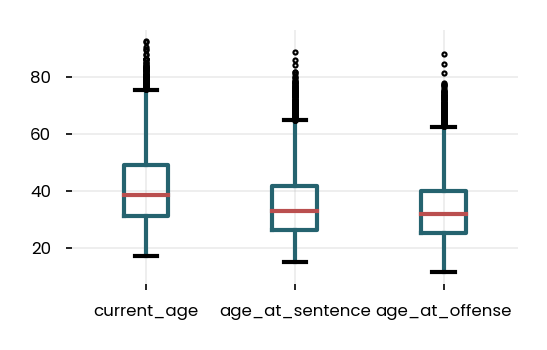

In [56]:
most_recent_sentence.boxplot(
    ["current_age", "age_at_sentence", "age_at_offense"], flierprops={"markersize": 0.5}
)

In [57]:
most_recent_sentence[
    (most_recent_sentence["age_at_offense"] >= 18)
    & (most_recent_sentence["age_at_offense"] < 25)
]

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY,race_or_ethnicity,lower_bound_eligibility_date,upper_bound_eligibility_date,age_at_offense,age_at_sentence,current_age
1,29644,1945-09-24,BLACK,N,MALE,1965-04-24,1965-10-29,9.48.030,MURDER 1,MURDER 1,30247.19,NaN,LIFE,KING,N,N,None,BLACK,BLACK,1963-09-24,1970-09-24,19.581109,20.095825,75.268994
7,126645,1944-08-22,WHITE,N,MALE,1968-04-15,1968-11-08,9.79.010,RAPE,RAPE 1,25749.96,NaN,LIFE,PIERCE,N,N,None,WHITE,WHITE,1962-08-22,1969-08-22,23.646817,24.213552,76.358658
10,127688,1951-06-29,WHITE,N,MALE,1971-04-20,1971-09-29,9.48.030,MURDER 1,MURDER 1,23132.06,NaN,LIFE,KING,N,N,None,WHITE,WHITE,1969-06-29,1976-06-29,19.808350,20.251882,69.508556
35,231996,1948-06-08,WHITE,N,MALE,1972-08-12,1973-02-21,9.48.040,MURDER 2,MURDER 2,27308.18,NaN,LIFE,KING,N,N,None,WHITE,WHITE,1966-06-08,1973-06-08,24.177960,24.706366,72.563997
40,233966,1951-11-14,WHITE,N,MALE,1974-06-01,1976-01-12,9.48.030,MURDER 1,MURDER 1,27977.20,NaN,LIFE,SPOKANE,N,N,None,WHITE,WHITE,1969-11-14,1976-11-14,22.546201,24.161533,69.130732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619,990482,1973-01-25,WHITE,N,MALE,1992-06-13,1992-11-25,9A.36.011,ASSAULT 1,ASSAULT I,6361.30,6360.0,None,CLARK,N,N,None,WHITE,WHITE,1991-01-25,1998-01-25,19.381246,19.832991,47.931554
14620,990551,1975-02-22,ASIAN/PACIFIC ISLANDER,N,MALE,1996-12-09,1998-10-02,16.52.205(1),ANIMAL CRUELTY 1 - INTENTIONAL,OTHER FELONY,4014.45,NaN,LWOP,KING,N,N,FIREARM,ASIAN/PACIFIC ISLANDER,ASIAN/PACIFIC ISLANDER,1993-02-22,2000-02-22,21.796030,23.608487,45.856263
14633,991811,1972-01-14,WHITE,N,MALE,1994-09-23,1995-04-20,10.95.020,AGGRAVATED MURDER 1,MURDER 1,0.00,NaN,LWOP,CLARK,N,N,None,WHITE,WHITE,1990-01-14,1997-01-14,22.691307,23.263518,48.963723
14692,995877,1973-06-07,BLACK,N,MALE,1996-07-15,1996-12-13,69.50.401,"DRUGS-MANUFACTURE,DELIVER,POSSESS W/INTENT TO ...",DRUG VIOLATIONS,20557.16,20561.0,None,KING,N,N,FIREARM,BLACK,BLACK,1991-06-07,1998-06-07,23.104723,23.518138,47.567420


In [58]:
most_recent_sentence[
    most_recent_sentence["age_at_sentence"] < most_recent_sentence["age_at_offense"]
]

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY,race_or_ethnicity,lower_bound_eligibility_date,upper_bound_eligibility_date,age_at_offense,age_at_sentence,current_age
828,310498,1983-11-25,WHITE,N,MALE,2020-08-06,2020-05-29,9A.48.080(1)(A),MALICIOUS MISCHIEF 2-PHYSICAL DAMAGE TO PROPER...,OTHER PROPERTY,902.89,903.0,None,WALLA WALLA,N,N,None,WHITE,WHITE,2001-11-25,2008-11-25,36.698152,36.509240,37.100616
1837,335772,1987-03-28,WHITE,Y,MALE,2009-07-27,2009-01-13,9.68A.090(2),COMMUNICATION WITH MINOR FOR IMMORAL PURPOSES,NON-VIOLENT CHILD SEX,7298.40,NaN,LIFE,LEWIS,N,N,None,HISPANIC,HISPANIC,2005-03-28,2012-03-28,22.332649,21.798768,33.763176
2072,340856,1990-01-01,BLACK,N,MALE,2010-10-29,2010-10-08,69.50.4013,POSSESSION OF CONTROLLED SUBSTANCE,DRUG VIOLATIONS,7298.40,7299.0,None,KING,N,N,FIREARM,BLACK,BLACK,2008-01-01,2015-01-01,20.824093,20.766598,30.997947
3226,360775,1991-06-13,WHITE,Y,MALE,2020-01-25,2019-03-19,9.94.010,PRISON RIOT,"ASSAULT, OTHER",2722.49,2722.0,None,SKAGIT,N,N,None,HISPANIC,HISPANIC,2009-06-13,2016-06-13,28.618754,27.764545,29.552361
4825,383790,1997-03-07,NORTH AMERICAN INDIAN,N,MALE,2020-09-14,2020-08-17,9A.56.068,POSSESSION OF A STOLEN VEHICLE,THEFT 2,425.74,426.0,None,KITSAP,N,N,None,NORTH AMERICAN INDIAN,NORTH AMERICAN INDIAN,2015-03-07,2022-03-07,23.523614,23.446954,23.819302
5249,389434,1996-03-02,WHITE,Y,MALE,2020-02-13,2018-02-01,46.20.342,MISD -DRIVING WITH LICENSE SUSPENDED,MISDEMEANOR - MISCELLANEOUS,89.82,1611.0,None,BENTON,N,N,None,HISPANIC,HISPANIC,2014-03-02,2021-03-02,23.950719,21.919233,24.832307
6714,406574,1989-08-02,WHITE,N,MALE,2017-07-15,2016-05-07,9A.52.025,RESIDENTIAL BURGLARY,BURGLARY II,933.30,934.0,None,SNOHOMISH,N,N,None,WHITE,WHITE,2007-08-02,2014-08-02,27.950719,26.762491,31.414100
6730,406779,2001-03-07,BLACK,N,MALE,2017-05-16,2017-03-23,9A.36.021(1)(C),ASSAULT 2 - WITH DEADLY WEAPON,ASSAULT II,2917.95,2918.0,None,SPOKANE,N,N,None,BLACK,BLACK,2019-03-07,2026-03-07,16.191650,16.043806,19.819302
6738,406822,1989-03-09,WHITE,Y,MALE,2016-10-26,2016-03-29,9A.32.030(1)(A),MURDER 1,MURDER 1,9852.84,9854.0,None,YAKIMA,N,N,None,HISPANIC,HISPANIC,2007-03-09,2014-03-09,27.633128,27.055441,31.813826
10208,759304,1973-07-06,WHITE,N,MALE,2018-01-12,2014-08-08,9A.44.132(1)(A),FAILURE TO REGISTER AS A FELONY SEX OFFENDER,OTHER SEX CRIMES,4530.01,4530.0,None,SPOKANE,N,N,None,WHITE,WHITE,1991-07-06,1998-07-06,44.520192,41.089665,47.488022


In [59]:
wa_df[wa_df["DOCNUM"] == 335772].sort_values(by="DATE_OF_OFFENSE")

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY,race_or_ethnicity
5995,335772,1987-03-28,WHITE,Y,MALE,2006-12-12,2009-01-13,9A.44.073,RAPE OF A CHILD 1,RAPE OF CHILD 1,7298.4,NaN,LIFE,LEWIS,N,N,NaN,HISPANIC,HISPANIC
5996,335772,1987-03-28,WHITE,Y,MALE,2007-12-12,2009-01-13,9A.44.076,RAPE OF A CHILD 2,RAPE OF CHILD 2,7298.4,NaN,LIFE,LEWIS,N,N,NaN,HISPANIC,HISPANIC
5997,335772,1987-03-28,WHITE,Y,MALE,2007-12-12,2009-01-13,9A.44.076,RAPE OF A CHILD 2,RAPE OF CHILD 2,7298.4,NaN,LIFE,LEWIS,N,N,NaN,HISPANIC,HISPANIC
5998,335772,1987-03-28,WHITE,Y,MALE,2009-07-27,2009-01-13,9.68A.090(2),COMMUNICATION WITH MINOR FOR IMMORAL PURPOSES,NON-VIOLENT CHILD SEX,7298.4,NaN,LIFE,LEWIS,N,N,NaN,HISPANIC,HISPANIC


<AxesSubplot:ylabel='Frequency'>

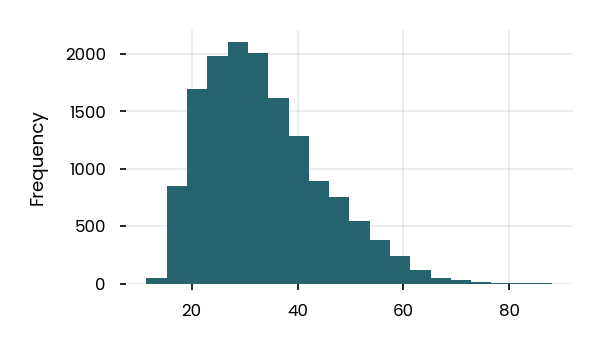

In [60]:
most_recent_sentence["age_at_offense"].plot.hist(bins=20)

**Analysis Questions**
1. The number of people given a 15+ year sentence between their 18th and 25th birthday w/ racial breakdown
1. The number of people serving a de facto life sentence (defined as 50+ years) for a crime they committed between their 18th and 25th birthday w/ racial breakdown
1. The number of people serving life without parole sentences for a crime committed between their 18th and 25th birthday w/ racial breakdown

**Analysis Requirement:**

In WA, people convicted of a sex offense in 2001 or later are given an indeterminate sentence and are not eligible for this policy

In [61]:
most_recent_sentence[
    (
        most_recent_sentence["DATE_OF_BIRTH"].dt.day
        == most_recent_sentence["DATE_OF_OFFENSE"].dt.day
    )
    & (
        most_recent_sentence["DATE_OF_BIRTH"].dt.month
        == most_recent_sentence["DATE_OF_OFFENSE"].dt.month
    )
]

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY,race_or_ethnicity,lower_bound_eligibility_date,upper_bound_eligibility_date,age_at_offense,age_at_sentence,current_age
360,288321,1952-08-01,BLACK,N,MALE,1986-08-01,1987-09-11,9A.32.045,AGGRAVATED MURDER 1,MURDER 1,14992.13,NaN,LWOP,KING,N,N,None,BLACK,BLACK,1970-08-01,1977-08-01,33.998631,35.110198,68.416153
423,298466,1956-04-02,WHITE,N,MALE,2020-04-02,2020-05-14,9A.44.132(1)(B),FAILURE TO REGISTER AS A FELONY SEX OFFENDER 2...,OTHER SEX CRIMES,1307.63,1308.0,None,LEWIS,N,N,None,WHITE,WHITE,1974-04-02,1981-04-02,64.000000,64.114990,64.747433
473,300563,1987-10-18,BLACK,N,MALE,2018-10-18,2019-03-08,9A.36.031(1)(F),ASSAULT 3 (NEGLIGENCE OR SUBSTANTIAL PAIN),"ASSAULT, OTHER",1824.60,1825.0,None,THURSTON,N,N,None,BLACK,BLACK,2005-10-18,2012-10-18,31.000684,31.386721,33.204654
548,302908,1981-10-07,BLACK,N,MALE,2018-10-07,2020-08-12,9A.32.050(1)(A),MURDER 2,MURDER 2,4446.86,4447.0,None,KING,N,N,None,BLACK,BLACK,1999-10-07,2006-10-07,36.999316,38.847365,39.233402
687,306355,1987-03-26,WHITE,N,MALE,2019-03-26,2019-07-25,9A.56.300,THEFT OF A FIREARM,THEFT 1,2341.57,2341.0,None,PIERCE,N,N,None,WHITE,WHITE,2005-03-26,2012-03-26,32.000000,32.331280,33.768652
2416,346983,1989-01-14,WHITE,N,MALE,2008-01-14,2011-03-22,9A.44.073,RAPE OF A CHILD 1,RAPE OF CHILD 1,3983.71,NaN,LIFE,ISLAND,N,N,None,WHITE,WHITE,2007-01-14,2014-01-14,18.997947,22.182067,31.961670
2470,347970,1986-08-08,WHITE,N,MALE,2019-08-08,2020-02-25,69.50.4013,POSSESSION OF CONTROLLED SUBSTANCE,DRUG VIOLATIONS,273.69,1551.0,None,COWLITZ,N,N,None,WHITE,WHITE,2004-08-08,2011-08-08,32.999316,33.549624,34.398357
2620,350600,1992-05-01,WHITE,Y,MALE,2018-05-01,2018-10-11,26.50.110(5),PROTECTION ORDER VIOLATION - SUBSEQUENT VIOLATION,DOMESTIC ASSAULT,1550.91,1551.0,None,BENTON,N,N,None,HISPANIC,HISPANIC,2010-05-01,2017-05-01,25.998631,26.444901,28.668036
2646,351080,1972-02-20,WHITE,N,MALE,2011-02-20,2011-09-08,9A.44.083,CHILD MOLESTATION 1,OTHER VIOLATION CHILD SEX,5321.75,NaN,LIFE,THURSTON,N,N,None,WHITE,WHITE,1990-02-20,1997-02-20,39.000684,39.548255,48.862423
2671,351778,1992-06-09,WHITE,N,MALE,2020-06-09,2020-07-09,9A.48.080,MALICIOUS MISCHIEF 2,OTHER PROPERTY,516.97,517.0,None,LEWIS,N,N,None,WHITE,WHITE,2010-06-09,2017-06-09,28.000000,28.082136,28.561259


In [62]:
young_adult_at_offense = most_recent_sentence[
    (
        most_recent_sentence["DATE_OF_OFFENSE"]
        <= most_recent_sentence["upper_bound_eligibility_date"]
    )
    & (
        most_recent_sentence["lower_bound_eligibility_date"]
        <= most_recent_sentence["DATE_OF_OFFENSE"]
    )
    & (~most_recent_sentence["DOCNUM"].isin(ineligible_people))
    & (
        (most_recent_sentence["TOTAL_SENTENCE"] >= 15 * 365.25)
        | most_recent_sentence["CONFINEMENT_TYPE"].notnull()
    )
    & (most_recent_sentence["DATE_OF_OFFENSE"] >= datetime.datetime(1985, 1, 1))
]
print(len(young_adult_at_offense))

analysis_groups = {"Offense Date": young_adult_at_offense}

1044


In [67]:
young_adult_at_offense["current_age"].describe()

count    1044.000000
mean       35.789335
std         7.865132
min        20.084873
25%        29.725530
50%        34.789870
75%        41.196441
max        60.377823
Name: current_age, dtype: float64

In [63]:
for group_description, group in analysis_groups.items():
    print(
        f"[{group_description}] Total People: {group['DOCNUM'].nunique()}, {len(group)}"
    )
    print("TOTAL SENTENCE LENGTH", (group["TOTAL_SENTENCE"] / 365.25).describe())

    fifteen_year_sentence = group[group["TOTAL_SENTENCE"] >= 15 * 365.25]
    fifty_year_sentence = group[
        (group["TOTAL_SENTENCE"] >= 50 * 365.25) | (group["CONFINEMENT_TYPE"] == "LIFE")
    ]
    life_without_parole_sentence = group[group["CONFINEMENT_TYPE"] == "LWOP"]
    sentence_groups = {
        "15+ years": fifteen_year_sentence,
        "50+ years/LIFE": fifty_year_sentence,
        "LWOP": life_without_parole_sentence,
    }
    for sentence_type, sent_group in sentence_groups.items():

        print(
            f"[{group_description}] Total People sentenced {sentence_type}: "
            f"{sent_group['DOCNUM'].nunique()}, {len(sent_group)}"
        )
        print(sent_group["race_or_ethnicity"].value_counts(dropna=False))
        print(
            sent_group["race_or_ethnicity"].value_counts(dropna=False) / len(sent_group)
        )

[Offense Date] Total People: 1044, 1044
TOTAL SENTENCE LENGTH count    1044.000000
mean       28.699118
std        17.474759
min         0.000000
25%        19.232608
50%        24.977413
75%        33.969281
max       162.852731
Name: TOTAL_SENTENCE, dtype: float64
[Offense Date] Total People sentenced 15+ years: 961, 961
WHITE                     330
BLACK                     308
HISPANIC                  203
ASIAN/PACIFIC ISLANDER     70
NORTH AMERICAN INDIAN      45
OTHER                       3
UNKNOWN                     2
Name: race_or_ethnicity, dtype: int64
WHITE                     0.343392
BLACK                     0.320499
HISPANIC                  0.211238
ASIAN/PACIFIC ISLANDER    0.072841
NORTH AMERICAN INDIAN     0.046826
OTHER                     0.003122
UNKNOWN                   0.002081
Name: race_or_ethnicity, dtype: float64
[Offense Date] Total People sentenced 50+ years/LIFE: 126, 126
BLACK                     49
WHITE                     43
HISPANIC             

In [66]:
young_adult_at_offense.head()

,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,race_or_ethnicity,lower_bound_eligibility_date,upper_bound_eligibility_date,age_at_offense,age_at_sentence,current_age
295,283614,1964-03-15,WHITE,N,MALE,1985-12-10,1986-08-01,9A.32.045,AGGRAVATED MURDER 1,MURDER 1,0.00,NaN,LWOP,MASON,N,N,None,WHITE,1982-03-15,1989-03-15,21.738535,22.379192,56.796715
384,291264,1964-05-12,WHITE,N,MALE,1988-08-17,1990-03-30,9A.56.200,ROBBERY 1,ROBBERY 1,25544.40,25549.0,None,KING,N,N,None,WHITE,1982-05-12,1989-05-12,24.265572,25.880903,56.637919
387,291750,1963-12-21,WHITE,N,MALE,1988-06-03,1989-05-04,9A.32.045,AGGRAVATED MURDER 1,MURDER 1,8857.23,NaN,LWOP,PIERCE,N,N,None,WHITE,1981-12-21,1988-12-21,24.451745,25.368925,57.029432
432,299180,1965-01-04,WHITE,N,MALE,1985-02-15,1986-03-31,9A.32.045,AGGRAVATED MURDER 1,MURDER 1,0.00,NaN,LWOP,SNOHOMISH,N,N,None,WHITE,1983-01-04,1990-01-04,20.114990,21.234771,55.989049
452,300261,1987-12-10,BLACK,N,MALE,2012-07-29,2013-04-18,9A.56.200,ROBBERY 1,ROBBERY 1,8849.31,8850.0,None,KING,N,N,FIREARM,BLACK,2005-12-10,2012-12-10,24.635181,25.355236,33.059548


In [69]:
young_adult_at_offense.to_csv("~/Downloads/WA_juvenile_sentence_data.csv", index=False)

In [42]:
not_eligible_young_adults = most_recent_sentence[
    (
        most_recent_sentence["DATE_OF_OFFENSE"]
        <= most_recent_sentence["upper_bound_eligibility_date"]
    )
    & (
        most_recent_sentence["lower_bound_eligibility_date"]
        <= most_recent_sentence["DATE_OF_OFFENSE"]
    )
    & (most_recent_sentence["DOCNUM"].isin(ineligible_people))
    & (
        (most_recent_sentence["TOTAL_SENTENCE"] >= 15 * 365.25)
        | most_recent_sentence["CONFINEMENT_TYPE"].notnull()
    )
]
print(len(not_eligible_young_adults))
not_eligible_young_adults.head()

427


,DOCNUM,DATE_OF_BIRTH,RACE,HISPANIC,GENDER,DATE_OF_OFFENSE,DATE_OF_SENTENCE,RCW_SHRT_NM,RCW_TLE_NM,OFFENSE,TOTAL_SENTENCE,CONFINEMENT_LENGTH,CONFINEMENT_TYPE,COUNTY_OF_CONVICTION,SECOND_STRIKE,THIRD_STRIKE,ENHANCEMENT,RACE_OR_ETHNICITY,age_at_offense,age_at_sentence,current_age,lower_bound_eligibility_date,upper_bound_eligibility_date
454,300315,1984-01-01,BLACK,N,MALE,2008-07-15,2009-10-23,9A.44.040,RAPE 1,RAPE 1,5594.03,NaN,LIFE,KING,N,N,None,BLACK,24.536619,25.0,36.0,2002-01-01,2009-01-01
465,300413,1984-08-30,WHITE,N,MALE,2006-04-02,2006-12-14,9A.44.050,RAPE 2,RAPE 2,1338.04,NaN,LIFE,SKAMANIA,N,N,None,WHITE,21.587953,22.0,36.0,2002-08-30,2009-08-30
506,301713,1983-07-06,WHITE,N,MALE,2008-02-20,2009-03-26,9A.44.076,RAPE OF A CHILD 2,RAPE OF CHILD 2,744.84,NaN,LIFE,CLARK,N,N,None,WHITE,24.626968,25.0,37.0,2001-07-06,2008-07-06
512,301923,1982-12-10,WHITE,N,MALE,2006-05-01,2007-05-25,9A.44.076,RAPE OF A CHILD 2,RAPE OF CHILD 2,4573.50,NaN,LIFE,PIERCE,N,N,None,WHITE,23.389459,24.0,38.0,2000-12-10,2007-12-10
551,302989,1985-07-30,WHITE,N,MALE,2005-01-01,2007-07-10,9A.44.083,CHILD MOLESTATION 1,OTHER VIOLATION CHILD SEX,2311.16,NaN,LIFE,COWLITZ,N,N,None,WHITE,19.425051,21.0,35.0,2003-07-30,2010-07-30


In [43]:
not_eligible_young_adults["OFFENSE"].value_counts(dropna=False)

RAPE OF CHILD 1              97
RAPE OF CHILD 2              78
OTHER VIOLATION CHILD SEX    75
RAPE 2                       40
RAPE 1                       22
NON-VIOLENT CHILD SEX        20
ASSAULT II                   17
INDECENT LIBERTIES           12
P.N. SEX                     12
ASSAULT, OTHER               11
MURDER 1                      6
ASSAULT I                     6
KIDNAP 1                      5
OTHER FELONY                  5
KIDNAP 2                      4
DOMESTIC ASSAULT              4
BURGLARY II                   2
MURDER 2                      2
OTHER SEX CRIMES              2
UNKNOWN                       1
DRUG VIOLATIONS               1
THEFT 2                       1
ROBBERY 1                     1
OTHER PROPERTY                1
RAPE, OTHER                   1
THEFT 1                       1
Name: OFFENSE, dtype: int64

In [33]:
most_recent_sentence["CONFINEMENT_TYPE"].value_counts(dropna=False)

NaN     11845
LIFE     2243
LWOP      635
Name: CONFINEMENT_TYPE, dtype: int64

In [ ]:
wa_df[wa_df["TOTAL_SENTENCE"] == 0]["CONFINEMENT_TYPE"].value_counts(dropna=False)

In [ ]:
wa_df[(wa_df["TOTAL_SENTENCE"] == 0) & (wa_df["CONFINEMENT_TYPE"].isnull())]

In [ ]:
juvenile_df["race_or_ethnicity"].value_counts(dropna=False)

In [ ]:
total_sentences = len(juvenile_sentence_df)
juvenile_sentence_df["race_or_ethnicity"].value_counts(dropna=False) / total_sentences

In [ ]:
total_sentences = len(juvenile_sentence_df)
juvenile_sentence_df["RACE"].value_counts(dropna=False) / total_sentences

In [ ]:
64 + 2 + 1

In [ ]:
60 / total_sentences